# Project 2

# Used Vehicle Price Prediction

## Introduction

- 1.2 Million listings scraped from TrueCar.com - Price, Mileage, Make, Model dataset from Kaggle: [data](https://www.kaggle.com/jpayne/852k-used-car-listings)
- Each observation represents the price of an used car

In [34]:
#Librerias

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from scipy import stats
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/albahnsen/AdvancedMethodsDataAnalysisClass/master/datasets/dataTrain_carListings.zip')

In [3]:
data.head()

,Price,Year,Mileage,State,Make,Model
0,21490,2014,31909,MD,Nissan,MuranoAWD
1,21250,2016,25741,KY,Chevrolet,CamaroCoupe
2,20925,2016,24633,SC,Hyundai,Santa
3,14500,2012,84026,OK,Jeep,Grand
4,32488,2013,22816,TN,Jeep,Wrangler


In [4]:
data.shape

(500000, 6)

In [5]:
data.Price.describe()

count    500000.000000
mean      21144.186304
std       10753.259704
min        5001.000000
25%       13499.000000
50%       18450.000000
75%       26998.000000
max       79999.000000
Name: Price, dtype: float64

<AxesSubplot:xlabel='Year', ylabel='Price'>

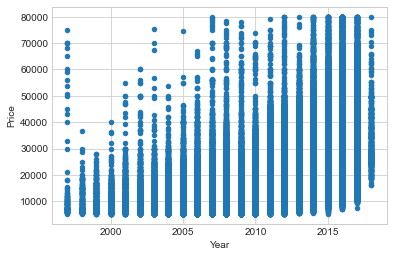

In [6]:
data.plot(kind='scatter', y='Price', x='Year')

<AxesSubplot:xlabel='Mileage', ylabel='Price'>

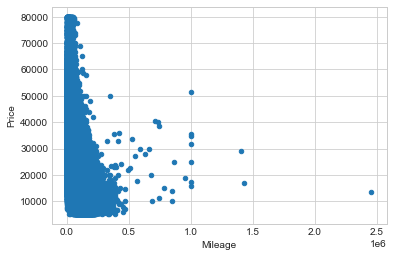

In [7]:
data.plot(kind='scatter', y='Price', x='Mileage')

In [8]:
data.columns

Index(['Price', 'Year', 'Mileage', 'State', 'Make', 'Model'], dtype='object')

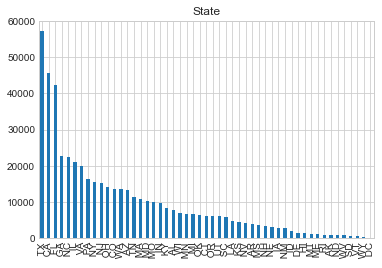

In [9]:

pd.value_counts(data['State'])
plot = data['State'].value_counts().plot(kind='bar',
                                            title='State')

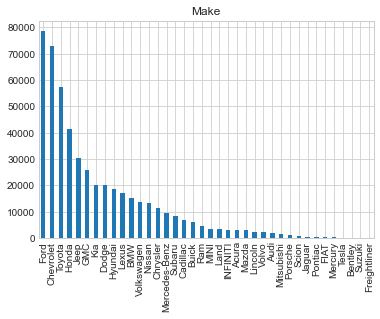

In [10]:
pd.value_counts(data['Make'])
plot = data['Make'].value_counts().plot(kind='bar',
                                            title='Make')

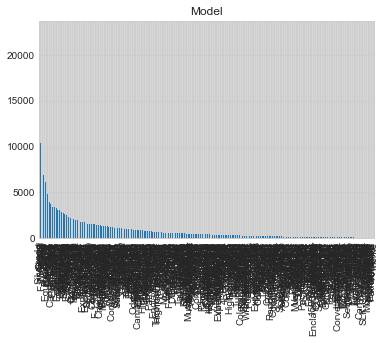

In [11]:
# tabla de frecuencia de Modelo, donde se indetifica que existen muchas categorias y esto no es óptimo para el modelo
pd.value_counts(data['Model'])
plot = data['Model'].value_counts().plot(kind='bar',
                                            title='Model')

In [12]:
## Se deben pasar a Dummies las variables categoricas

data_2 = pd.get_dummies(data[['State','Make','Model']])

print("The original DataFrame is:")
print(data, "\n")

print("DataFrame with Dummies:")
print(data_2)

The original DataFrame is:
        Price  Year  Mileage State       Make        Model
0       21490  2014    31909    MD     Nissan    MuranoAWD
1       21250  2016    25741    KY  Chevrolet  CamaroCoupe
2       20925  2016    24633    SC    Hyundai        Santa
3       14500  2012    84026    OK       Jeep        Grand
4       32488  2013    22816    TN       Jeep     Wrangler
...       ...   ...      ...   ...        ...          ...
499995  16997  2013    40393    TX        BMW            1
499996  11990  2012    91794    WA    Hyundai        Santa
499997  49991  2014    39107    MS       Ford        Super
499998  21888  2010    62556    NH      Dodge          Ram
499999  63973  2017    17653    NJ  Chevrolet  Suburban4WD

[500000 rows x 6 columns] 

DataFrame with Dummies:
        State_ AK  State_ AL  State_ AR  State_ AZ  State_ CA  State_ CO  \
0               0          0          0          0          0          0   
1               0          0          0          0          

In [13]:
data_2['Model_Yukon4WD'].unique()
pd.value_counts(data_2['Model_Yukon4WD'])

0    498448
1      1552
Name: Model_Yukon4WD, dtype: int64

In [14]:
##Consolidar data con dummies y demás variables
data_3 = data_2
data_2 = pd.concat([data, data_2], axis=1)
columns_names = data_2.columns.values
columns_names

array(['Price', 'Year', 'Mileage', 'State', 'Make', 'Model', 'State_ AK',
       'State_ AL', 'State_ AR', 'State_ AZ', 'State_ CA', 'State_ CO',
       'State_ CT', 'State_ DC', 'State_ DE', 'State_ FL', 'State_ GA',
       'State_ HI', 'State_ IA', 'State_ ID', 'State_ IL', 'State_ IN',
       'State_ KS', 'State_ KY', 'State_ LA', 'State_ MA', 'State_ MD',
       'State_ ME', 'State_ MI', 'State_ MN', 'State_ MO', 'State_ MS',
       'State_ MT', 'State_ NC', 'State_ ND', 'State_ NE', 'State_ NH',
       'State_ NJ', 'State_ NM', 'State_ NV', 'State_ NY', 'State_ OH',
       'State_ OK', 'State_ OR', 'State_ PA', 'State_ RI', 'State_ SC',
       'State_ SD', 'State_ TN', 'State_ TX', 'State_ UT', 'State_ VA',
       'State_ VT', 'State_ WA', 'State_ WI', 'State_ WV', 'State_ WY',
       'Make_Acura', 'Make_Audi', 'Make_BMW', 'Make_Bentley',
       'Make_Buick', 'Make_Cadillac', 'Make_Chevrolet', 'Make_Chrysler',
       'Make_Dodge', 'Make_FIAT', 'Make_Ford', 'Make_Freightliner',
   

In [15]:
data_2.drop(['State','Make','Model'], inplace=True, axis=1)

# Exercise P2.1 (50%)

Develop a machine learning model that predicts the price of the of car using as an input ['Year', 'Mileage', 'State', 'Make', 'Model']

#### Evaluation:
- 25% - Performance of the models using a manually implemented K-Fold (K=10) cross-validation
- 25% - Notebook explaining the process for selecting the best model. You must specify how the calibration of each of the parameters is done and how these change the performance of the model. It is expected that a clear comparison will be made of all implemented models.. Present the most relevant conslusions about the whole process. 


In [16]:
## Selección de variables

X = data_2.drop(['Price'], axis=1)
y = data_2['Price']

In [17]:
# Train/test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [18]:
# Importance feautures

# define the model
model = DecisionTreeRegressor()

# fit the model
model.fit(X_train, y_train)

# get importance
importance = model.feature_importances_
# importance
# summarize feature importance
results=[]
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
    results.append((i,v))

Feature: 0, Score: 0.25805
Feature: 1, Score: 0.11792
Feature: 2, Score: 0.00024
Feature: 3, Score: 0.00097
Feature: 4, Score: 0.00049
Feature: 5, Score: 0.00130
Feature: 6, Score: 0.00250
Feature: 7, Score: 0.00122
Feature: 8, Score: 0.00057
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00014
Feature: 11, Score: 0.00264
Feature: 12, Score: 0.00168
Feature: 13, Score: 0.00020
Feature: 14, Score: 0.00036
Feature: 15, Score: 0.00035
Feature: 16, Score: 0.00128
Feature: 17, Score: 0.00085
Feature: 18, Score: 0.00044
Feature: 19, Score: 0.00074
Feature: 20, Score: 0.00051
Feature: 21, Score: 0.00084
Feature: 22, Score: 0.00090
Feature: 23, Score: 0.00026
Feature: 24, Score: 0.00062
Feature: 25, Score: 0.00065
Feature: 26, Score: 0.00082
Feature: 27, Score: 0.00049
Feature: 28, Score: 0.00028
Feature: 29, Score: 0.00167
Feature: 30, Score: 0.00011
Feature: 31, Score: 0.00047
Feature: 32, Score: 0.00036
Feature: 33, Score: 0.00126
Feature: 34, Score: 0.00052
Feature: 35, Score: 0.00065
Fe

In [19]:
X_columns = X_train.columns

# compute feature importances
features=pd.DataFrame({'feature':X_columns, 'importance':model.feature_importances_}).sort_values('importance',ascending=False)
# features.to_csv('features_importante_v1.csv')

In [32]:
features.head(61)

,feature,importance
0,Year,0.258050
1,Mileage,0.117923
508,Model_Silverado,0.030039
529,Model_Super,0.026368
65,Make_GMC,0.025268
...,...,...
216,Model_Corvette2dr,0.002382
288,Model_F-150XLT,0.002349
53,Make_Acura,0.002306
90,Make_Volvo,0.002232


Se realizó la selección de variables con base en la importancia a partir del modelo DecisionTreeRegressor dejando las variables TOP 61 teniendo en cuenta que la suma de su importancia corresponde al 80%. Esto nos permitió eliminar una gran cantidad de variables dummy derivadas de las variables categóricas iniciales.

Las variables eliminadas fuero resumidas en una sola columna llamada "Otros" para cada una de las variables que inicialmente eran categóricas: State, Model, Make

In [20]:
data_2_top = data_2[['Year','Mileage','Model_Silverado','Model_Super','Make_GMC','Make_Lexus','Model_F-1504WD','Model_Tahoe4WD','Model_Wrangler','Make_BMW','Make_Mercedes-Benz','Make_Land','Model_Escalade','Model_Suburban4WD','Make_Kia','Make_Ram','Model_Suburban2WD','Model_Tundra','Model_Tahoe2WD','Model_Sierra','Model_TahoeLT','Model_Rover','Model_FusionSE','Model_CruzeSedan','Model_CorvetteCoupe','Make_Hyundai','Make_Volkswagen','Model_TerrainFWD','Model_FocusSE','Model_Grand','Make_Ford','Model_25004WD','Model_CorollaLE','Model_F-250Lariat','Make_Dodge','Make_Cadillac','Make_Lincoln','Make_Porsche','Model_EscapeSE','Model_F-150Lariat','Model_F-150SuperCrew','Model_Model','Model_TerrainAWD','State_ TX','Make_Jeep','Make_Honda','Model_CayenneAWD','Make_Nissan','Model_3','Model_F-350Lariat','State_ FL','Model_MalibuLT','Make_Toyota','State_ CA','Model_Tacoma4WD','Model_TundraSR5','Model_Corvette2dr','Model_Yukon','Model_F-150XLT','Make_Acura','Make_Volvo','Model_FiestaSE']]
data_2_top

,Year,Mileage,Model_Silverado,Model_Super,Make_GMC,Make_Lexus,Model_F-1504WD,Model_Tahoe4WD,Model_Wrangler,Make_BMW,...,Make_Toyota,State_ CA,Model_Tacoma4WD,Model_TundraSR5,Model_Corvette2dr,Model_Yukon,Model_F-150XLT,Make_Acura,Make_Volvo,Model_FiestaSE
0,2014,31909,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2016,25741,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2016,24633,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2012,84026,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2013,22816,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,2013,40393,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
499996,2012,91794,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
499997,2014,39107,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
499998,2010,62556,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
data_2_low = data_2[['Model_Land','Model_Ram','Model_EscapeFWD','Model_AcadiaFWD','Model_9112dr','Model_CorvetteConvertible','Model_4Runner4WD','Model_PilotEX-L','Model_Civic','Model_OdysseyTouring','State_ NC','Model_Continental','Model_MustangShelby','Model_OdysseyEX-L','State_ GA','Make_Buick','Model_Yukon4WD','Make_Audi','Model_F-150Platinum','Model_Escape4WD','Model_200Limited','Model_AcadiaAWD','Model_PilotTouring','State_ WA','Model_ColoradoCrew','Model_CTS-V','Model_FJ','Model_Pilot4WD','Make_Chrysler','Make_Chevrolet','Model_HighlanderLimited','Model_FusionHybrid','Model_TundraLimited','Model_E-ClassE','State_ VA','Model_A8','Model_LX','State_ IL','Model_4RunnerLimited','State_ AZ','Model_CamryLE','Model_CamrySE','Model_CorollaL','State_ NJ','Model_Yukon2WD','State_ CO','Model_XC90AWD','Model_CorollaS','State_ PA','Model_FusionS','Model_6','Model_Santa','Model_ChallengerR/T','Model_DurangoAWD','Model_4RunnerSR5','Model_F-150FX4','Model_LS','State_ NY','Model_EnclaveLeather','Model_TacomaBase','Model_7','Model_F-250XLT','Model_Sequoia4WD','Model_SequoiaPlatinum','Model_HighlanderFWD','Model_WranglerSport','Model_GX','State_ TN','Model_Malibu1LT','Model_CanyonCrew','State_ OH','State_ AL','Model_35004WD','Model_Expedition','Model_F-250King','Model_EnclavePremium','Make_Subaru','Model_LXLX','State_ MD','Model_Explorer4WD','Model_Tacoma2WD','Model_Wrangler4WD','State_ IN','State_ OR','Model_C-ClassC300','State_ MA','State_ UT','Model_Boxster2dr','State_ MO','Model_SonicSedan','Make_Tesla','Model_CamaroCoupe','Model_GXGX','Model_TundraBase','State_ KY','Model_S60T5','Model_WranglerRubicon','State_ SC','Model_EscaladeAWD','Model_SiennaXLE','Model_CivicLX','Model_F-1502WD','Model_MalibuLS','Model_LSLS','State_ NV','State_ OK','Model_WranglerSahara','State_ MN','Model_TaurusSEL','Model_F-150King','Model_Pilot2WD','Model_F-350XLT','Model_EscapeS','Model_F-350King','Model_TraverseAWD','Make_MINI','State_ WI','Model_CR-VEX-L','Model_X5xDrive35i','Model_Escalade2WD','State_ MI','Model_Durango2WD','Model_TacomaPreRunner','Model_Avalanche4WD','State_ CT','Model_Golf','Model_1500Laramie','Model_MustangBase','Model_ForteLX','Model_CT','Model_QX564WD','Model_4RunnerRWD','Make_INFINITI','Model_Challenger2dr','State_ NM','Model_Express','Model_TraverseFWD','State_ LA','Model_F-350XL','Make_Mitsubishi','Make_Bentley','Model_CamaroConvertible','Model_ExpeditionLimited','State_ AR','Model_Yaris','State_ MS','Model_MDXAWD','Model_SorentoSX','Model_FocusTitanium','State_ NE','Model_Transit','State_ KS','Model_X3xDrive28i','Model_SequoiaLimited','Model_Armada4WD','Model_MustangPremium','Model_F-150XL','Model_Titan4WD','Model_Savana','Model_CamryXLE','Model_EdgeSEL','Model_JourneySXT','Model_500Pop','Make_Jaguar','Model_F-150Limited','Model_RX','Model_OptimaLX','Model_200S','Model_EquinoxFWD','Model_Outback2.5i','Model_TaurusLimited','Model_CTCT','Model_FocusS','State_ NH','Model_CherokeeLimited','Model_M-ClassML350','State_ IA','State_ ID','Model_Elantra4dr','Model_Focus4dr','Model_MKXAWD','Model_F-250XL','Make_Mazda','Model_G37','Model_EdgeSE','Model_PriusTwo','Model_RAV4XLE','Model_5','Model_ES','Model_4RunnerTrail','Model_MuranoAWD','Model_WRXSTI','Model_Jetta','Model_Prius','Model_X1xDrive28i','Model_Outback3.6R','Model_CanyonExtended','Model_ExplorerLimited','Model_RXRX','Model_PacificaLimited','Model_ImpalaLT','Model_SonicHatch','Model_RidgelineRTL','Model_ESES','Model_AvalonXLE','Model_ExplorerXLT','Model_TahoeLS','Model_AvalonLimited','Model_Impreza','State_ MT','Model_FiestaS','Model_RioLX','Model_Soul+','Model_Mustang2dr','Model_RAV4Limited','Model_Expedition4WD','State_ ME','Model_PilotSE','Model_PatriotSport','Model_CruzeLT','Model_PathfinderS','Model_Camaro2dr','State_ AK','Model_SiennaLimited','State_ RI','Model_MustangGT','Model_Highlander','Model_Fusion4dr','Model_SorentoEX','Model_Altima4dr','Model_PilotEX','Model_EquinoxAWD','Model_IS','Model_RAV4LE','Model_JourneyFWD','Model_Sentra4dr','Model_Malibu','Model_TaurusSE','Model_Econoline','Model_QX562WD','Model_ISIS','Model_Accord','State_ HI','Model_Cayman2dr','Model_SiennaSE','Model_SiennaLE','Model_Outlander','Model_Avalanche2WD','Model_Armada2WD','Model_Legacy2.5i','Model_E-ClassE350','Model_DurangoSXT','Model_Highlander4WD','Model_ChargerSXT','Model_Versa5dr','Model_ExplorerBase','Model_YarisLE','Model_Titan','Model_CTS','Model_200LX','Model_Tundra4WD','Model_ExpeditionXLT','Model_GS','Make_Scion','Model_Frontier4WD','Model_SoulBase','State_ WY','Model_FocusST','Model_Malibu4dr','Model_Corolla4dr','Model_CX-9AWD','Model_RAV4FWD','Model_OdysseyEX','Model_EdgeSport','Model_XC90T6','Model_PilotLX','Model_GSGS','State_ DE','Model_SequoiaSR5','Model_PriusThree','State_ SD','Model_Sprinter','Model_Expedition2WD','Model_CamryL','Model_TucsonLimited','Model_Versa4dr','Model_Lancer4dr','Model_ColoradoExtended','Model_EdgeLimited','Model_Charger4dr','Model_Camry','Model_PriusFour','Model_Camry4dr','Model_FocusSEL','Model_Wrangler2dr','Model_RidgelineSport','Model_CTS4dr','Model_AccordLX','Model_C-Class4dr','Model_200Touring','Model_Elantra','State_ WV','Model_CompassSport','Model_F-150FX2','Model_DTS4dr','Model_PriusFive','Model_SorentoLX','State_ VT','Model_OptimaSX','State_ ND','Model_Excursion137"','Model_Passat4dr','Model_LaCrosseFWD','Model_ForteEX','Model_ExplorerFWD','Make_FIAT','Model_Genesis','Model_FlexSEL','Model_SL-ClassSL500','Model_Sienna5dr','Model_A44dr','Model_Navigator4WD','Model_CivicEX','Model_Tundra2WD','Model_WranglerX','Model_Cooper','Model_CR-VEX','Model_FlexLimited','Model_Titan2WD','Model_Focus5dr','Model_15002WD','Model_S2000Manual','Model_ElantraLimited','Model_MKXFWD','Model_HighlanderBase','Model_Navigator','Model_MX5','Model_RegalPremium','Model_SportageEX','Model_15004WD','Model_X5AWD','Model_Sonata4dr','Model_RegalTurbo','Model_F-150STX','Model_CX-9FWD','Model_ChargerSE','Model_HighlanderSE','Model_Navigator4dr','Model_STS4dr','Model_Impreza2.0i','Model_Town','Model_SonataLimited','Model_C-ClassC350','Model_AccordEX-L','Model_FlexSE','Model_Colorado4WD','Model_SC','Model_Caliber4dr','Model_SportageLX','Model_SportageSX','Model_MKZ4dr','Model_FitSport','Model_TaurusSHO','Model_Impala4dr','Model_300300S','Model_SRXLuxury','Model_CX-9Grand','Model_RogueFWD','Model_Explorer','Model_Touareg4dr','Model_300Limited','Model_Pathfinder4WD','Model_SedonaEX','Model_4Runner2WD','Model_WRXLimited','Model_CompassLatitude','Model_3004dr','Model_TucsonFWD','Model_TucsonAWD','Model_EnclaveConvenience','Model_Mazda34dr','Model_Dakota4WD','Model_RAV4','Model_OptimaEX','Model_PriusOne','Model_1','Model_AvalonTouring','Model_PatriotLatitude','Model_SonataSE','Model_RDXAWD','Model_Forte','Model_XK2dr','Model_ImpalaLS','Model_25002WD','Model_Navigator2WD','Model_350Z2dr','Model_Prius5dr','Model_WRXBase','Model_300300C','Model_FX35AWD','Model_Maxima4dr','Model_SportageAWD','Model_RAV44WD','Model_Frontier2WD','Model_Sportage2WD','Model_Accent4dr','Model_Q7quattro','Model_Dakota2WD','Model_Murano2WD','Model_CR-V4WD','Model_Xterra4WD','Model_Cobalt4dr','Model_Avalon4dr','Model_Legacy3.6R','Model_SedonaLX','Model_TiguanS','Model_4Runner4dr','Model_WRXPremium','Model_XC60T6','Model_EscapeXLT','Model_Pathfinder2WD','Model_Ranger4WD','Model_FusionSEL','Model_S44dr','Model_CR-VLX','Model_CR-ZEX','Model_XJ4dr','Model_CompassLimited','Model_XF4dr','Model_OdysseyLX','Model_Colorado2WD','Model_ImprezaSport','Make_Freightliner','Model_G35','Model_C-ClassC','Model_A34dr','Model_Liberty4WD','Model_TiguanSEL','Model_XC60FWD','Model_LaCrosseAWD','Model_Escalade4dr','Model_TL4dr','Model_YarisBase','Model_CivicEX-L','Model_1500Tradesman','Model_LibertyLimited','Make_Mercury','Model_Tahoe4dr','Make_Pontiac','Model_CR-V2WD','Model_RangerSuperCab','Model_Cobalt2dr','Model_AccordLX-S','Model_Q5quattro','Model_Taurus4dr','Model_GTI4dr','Model_Sorento2WD','Model_VeracruzFWD','Model_AccordEX','Model_Sequoia4dr','Model_PT','Model_XC60AWD','Model_Element4WD','Model_A64dr','Model_CivicSi','Model_SLK-ClassSLK350','Model_CherokeeSport','Model_MuranoS','Model_JourneyAWD','Model_Outlander4WD','Model_Mazda64dr','Model_CX-9Touring','Model_Eos2dr','Model_Matrix5dr','Model_VeracruzAWD','Model_Yaris4dr','Model_LaCrosse4dr','Model_300Base','Model_Suburban4dr','Model_Ranger2WD','Model_X3AWD','Model_Optima4dr','Model_PatriotLimited','Model_CC4dr','Model_Frontier','Model_Regal4dr','Model_AccordSE','Model_911','Model_RegalGS','Model_Highlander4dr','Model_LibertySport','Model_Galant4dr','Model_RAV4Sport','Model_ForteSX','Model_RAV4Base','Model_E-ClassE320','Model_Lucerne4dr','Model_Quest4dr','Model_CR-VSE','Model_GTI2dr','Model_Escape4dr','Model_EscapeLimited','Model_MDX4WD','Model_tC2dr','Model_Forester2.5X','Model_Patriot4WD','Model_Forester4dr','Model_S804dr','Model_CX-7FWD','Model_300Touring','Model_Milan4dr','Model_CamryBase','Model_RDXFWD','Model_Mazda35dr','Model_XC90FWD','Model_Outlander2WD','Model_New','Model_Element2WD','Model_XC704dr','Model_Tiguan2WD','Model_Canyon4WD','Model_TT2dr','Model_xB5dr','Model_Xterra2WD','Model_Canyon2WD','Model_xD5dr','Model_Sedona4dr','Model_PacificaTouring','Model_Compass4WD','Model_MustangDeluxe','Make_Suzuki','Model_Xterra4dr','Model_Monte','Model_Azera4dr','Model_G64dr','Model_TiguanSE','Model_Explorer4dr','Model_EscapeLImited','Model_RAV44dr','Model_PriusBase','Model_ExplorerEddie','State_ DC','Model_C702dr','Model_PathfinderSE','Model_Eclipse3dr','Model_Passat','Model_TSXAutomatic','Model_GLI4dr','Model_TLAutomatic','Model_RX-84dr','Model_Legacy','Model_Vibe4dr','Model_Durango4dr','Model_Yukon4dr',]]
data_2_low

,Model_Land,Model_Ram,Model_EscapeFWD,Model_AcadiaFWD,Model_9112dr,Model_CorvetteConvertible,Model_4Runner4WD,Model_PilotEX-L,Model_Civic,Model_OdysseyTouring,...,Model_Eclipse3dr,Model_Passat,Model_TSXAutomatic,Model_GLI4dr,Model_TLAutomatic,Model_RX-84dr,Model_Legacy,Model_Vibe4dr,Model_Durango4dr,Model_Yukon4dr
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
499996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
499997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
499998,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
data_2_low['Make_Otros'] = data_2_low[[col for col in data_2_low.columns if col.startswith('Make_')]].sum(axis=1)
data_2_low

,Model_Land,Model_Ram,Model_EscapeFWD,Model_AcadiaFWD,Model_9112dr,Model_CorvetteConvertible,Model_4Runner4WD,Model_PilotEX-L,Model_Civic,Model_OdysseyTouring,...,Model_Passat,Model_TSXAutomatic,Model_GLI4dr,Model_TLAutomatic,Model_RX-84dr,Model_Legacy,Model_Vibe4dr,Model_Durango4dr,Model_Yukon4dr,Make_Otros
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
499996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
499997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
499998,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
data_2_low['Model_Otros'] = data_2_low[[col for col in data_2_low.columns if col.startswith('Model_')]].sum(axis=1)
data_2_low

,Model_Land,Model_Ram,Model_EscapeFWD,Model_AcadiaFWD,Model_9112dr,Model_CorvetteConvertible,Model_4Runner4WD,Model_PilotEX-L,Model_Civic,Model_OdysseyTouring,...,Model_TSXAutomatic,Model_GLI4dr,Model_TLAutomatic,Model_RX-84dr,Model_Legacy,Model_Vibe4dr,Model_Durango4dr,Model_Yukon4dr,Make_Otros,Model_Otros
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
499996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
499997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
499998,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [24]:
data_2_low['State_Otros'] = data_2_low[[col for col in data_2_low.columns if col.startswith('State_')]].sum(axis=1)
data_2_low

,Model_Land,Model_Ram,Model_EscapeFWD,Model_AcadiaFWD,Model_9112dr,Model_CorvetteConvertible,Model_4Runner4WD,Model_PilotEX-L,Model_Civic,Model_OdysseyTouring,...,Model_GLI4dr,Model_TLAutomatic,Model_RX-84dr,Model_Legacy,Model_Vibe4dr,Model_Durango4dr,Model_Yukon4dr,Make_Otros,Model_Otros,State_Otros
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
499996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
499997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
499998,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [25]:
data_2_low.drop(['Model_Land','Model_Ram','Model_EscapeFWD','Model_AcadiaFWD','Model_9112dr','Model_CorvetteConvertible','Model_4Runner4WD','Model_PilotEX-L','Model_Civic','Model_OdysseyTouring','State_ NC','Model_Continental','Model_MustangShelby','Model_OdysseyEX-L','State_ GA','Make_Buick','Model_Yukon4WD','Make_Audi','Model_F-150Platinum','Model_Escape4WD','Model_200Limited','Model_AcadiaAWD','Model_PilotTouring','State_ WA','Model_ColoradoCrew','Model_CTS-V','Model_FJ','Model_Pilot4WD','Make_Chrysler','Make_Chevrolet','Model_HighlanderLimited','Model_FusionHybrid','Model_TundraLimited','Model_E-ClassE','State_ VA','Model_A8','Model_LX','State_ IL','Model_4RunnerLimited','State_ AZ','Model_CamryLE','Model_CamrySE','Model_CorollaL','State_ NJ','Model_Yukon2WD','State_ CO','Model_XC90AWD','Model_CorollaS','State_ PA','Model_FusionS','Model_6','Model_Santa','Model_ChallengerR/T','Model_DurangoAWD','Model_4RunnerSR5','Model_F-150FX4','Model_LS','State_ NY','Model_EnclaveLeather','Model_TacomaBase','Model_7','Model_F-250XLT','Model_Sequoia4WD','Model_SequoiaPlatinum','Model_HighlanderFWD','Model_WranglerSport','Model_GX','State_ TN','Model_Malibu1LT','Model_CanyonCrew','State_ OH','State_ AL','Model_35004WD','Model_Expedition','Model_F-250King','Model_EnclavePremium','Make_Subaru','Model_LXLX','State_ MD','Model_Explorer4WD','Model_Tacoma2WD','Model_Wrangler4WD','State_ IN','State_ OR','Model_C-ClassC300','State_ MA','State_ UT','Model_Boxster2dr','State_ MO','Model_SonicSedan','Make_Tesla','Model_CamaroCoupe','Model_GXGX','Model_TundraBase','State_ KY','Model_S60T5','Model_WranglerRubicon','State_ SC','Model_EscaladeAWD','Model_SiennaXLE','Model_CivicLX','Model_F-1502WD','Model_MalibuLS','Model_LSLS','State_ NV','State_ OK','Model_WranglerSahara','State_ MN','Model_TaurusSEL','Model_F-150King','Model_Pilot2WD','Model_F-350XLT','Model_EscapeS','Model_F-350King','Model_TraverseAWD','Make_MINI','State_ WI','Model_CR-VEX-L','Model_X5xDrive35i','Model_Escalade2WD','State_ MI','Model_Durango2WD','Model_TacomaPreRunner','Model_Avalanche4WD','State_ CT','Model_Golf','Model_1500Laramie','Model_MustangBase','Model_ForteLX','Model_CT','Model_QX564WD','Model_4RunnerRWD','Make_INFINITI','Model_Challenger2dr','State_ NM','Model_Express','Model_TraverseFWD','State_ LA','Model_F-350XL','Make_Mitsubishi','Make_Bentley','Model_CamaroConvertible','Model_ExpeditionLimited','State_ AR','Model_Yaris','State_ MS','Model_MDXAWD','Model_SorentoSX','Model_FocusTitanium','State_ NE','Model_Transit','State_ KS','Model_X3xDrive28i','Model_SequoiaLimited','Model_Armada4WD','Model_MustangPremium','Model_F-150XL','Model_Titan4WD','Model_Savana','Model_CamryXLE','Model_EdgeSEL','Model_JourneySXT','Model_500Pop','Make_Jaguar','Model_F-150Limited','Model_RX','Model_OptimaLX','Model_200S','Model_EquinoxFWD','Model_Outback2.5i','Model_TaurusLimited','Model_CTCT','Model_FocusS','State_ NH','Model_CherokeeLimited','Model_M-ClassML350','State_ IA','State_ ID','Model_Elantra4dr','Model_Focus4dr','Model_MKXAWD','Model_F-250XL','Make_Mazda','Model_G37','Model_EdgeSE','Model_PriusTwo','Model_RAV4XLE','Model_5','Model_ES','Model_4RunnerTrail','Model_MuranoAWD','Model_WRXSTI','Model_Jetta','Model_Prius','Model_X1xDrive28i','Model_Outback3.6R','Model_CanyonExtended','Model_ExplorerLimited','Model_RXRX','Model_PacificaLimited','Model_ImpalaLT','Model_SonicHatch','Model_RidgelineRTL','Model_ESES','Model_AvalonXLE','Model_ExplorerXLT','Model_TahoeLS','Model_AvalonLimited','Model_Impreza','State_ MT','Model_FiestaS','Model_RioLX','Model_Soul+','Model_Mustang2dr','Model_RAV4Limited','Model_Expedition4WD','State_ ME','Model_PilotSE','Model_PatriotSport','Model_CruzeLT','Model_PathfinderS','Model_Camaro2dr','State_ AK','Model_SiennaLimited','State_ RI','Model_MustangGT','Model_Highlander','Model_Fusion4dr','Model_SorentoEX','Model_Altima4dr','Model_PilotEX','Model_EquinoxAWD','Model_IS','Model_RAV4LE','Model_JourneyFWD','Model_Sentra4dr','Model_Malibu','Model_TaurusSE','Model_Econoline','Model_QX562WD','Model_ISIS','Model_Accord','State_ HI','Model_Cayman2dr','Model_SiennaSE','Model_SiennaLE','Model_Outlander','Model_Avalanche2WD','Model_Armada2WD','Model_Legacy2.5i','Model_E-ClassE350','Model_DurangoSXT','Model_Highlander4WD','Model_ChargerSXT','Model_Versa5dr','Model_ExplorerBase','Model_YarisLE','Model_Titan','Model_CTS','Model_200LX','Model_Tundra4WD','Model_ExpeditionXLT','Model_GS','Make_Scion','Model_Frontier4WD','Model_SoulBase','State_ WY','Model_FocusST','Model_Malibu4dr','Model_Corolla4dr','Model_CX-9AWD','Model_RAV4FWD','Model_OdysseyEX','Model_EdgeSport','Model_XC90T6','Model_PilotLX','Model_GSGS','State_ DE','Model_SequoiaSR5','Model_PriusThree','State_ SD','Model_Sprinter','Model_Expedition2WD','Model_CamryL','Model_TucsonLimited','Model_Versa4dr','Model_Lancer4dr','Model_ColoradoExtended','Model_EdgeLimited','Model_Charger4dr','Model_Camry','Model_PriusFour','Model_Camry4dr','Model_FocusSEL','Model_Wrangler2dr','Model_RidgelineSport','Model_CTS4dr','Model_AccordLX','Model_C-Class4dr','Model_200Touring','Model_Elantra','State_ WV','Model_CompassSport','Model_F-150FX2','Model_DTS4dr','Model_PriusFive','Model_SorentoLX','State_ VT','Model_OptimaSX','State_ ND','Model_Excursion137"','Model_Passat4dr','Model_LaCrosseFWD','Model_ForteEX','Model_ExplorerFWD','Make_FIAT','Model_Genesis','Model_FlexSEL','Model_SL-ClassSL500','Model_Sienna5dr','Model_A44dr','Model_Navigator4WD','Model_CivicEX','Model_Tundra2WD','Model_WranglerX','Model_Cooper','Model_CR-VEX','Model_FlexLimited','Model_Titan2WD','Model_Focus5dr','Model_15002WD','Model_S2000Manual','Model_ElantraLimited','Model_MKXFWD','Model_HighlanderBase','Model_Navigator','Model_MX5','Model_RegalPremium','Model_SportageEX','Model_15004WD','Model_X5AWD','Model_Sonata4dr','Model_RegalTurbo','Model_F-150STX','Model_CX-9FWD','Model_ChargerSE','Model_HighlanderSE','Model_Navigator4dr','Model_STS4dr','Model_Impreza2.0i','Model_Town','Model_SonataLimited','Model_C-ClassC350','Model_AccordEX-L','Model_FlexSE','Model_Colorado4WD','Model_SC','Model_Caliber4dr','Model_SportageLX','Model_SportageSX','Model_MKZ4dr','Model_FitSport','Model_TaurusSHO','Model_Impala4dr','Model_300300S','Model_SRXLuxury','Model_CX-9Grand','Model_RogueFWD','Model_Explorer','Model_Touareg4dr','Model_300Limited','Model_Pathfinder4WD','Model_SedonaEX','Model_4Runner2WD','Model_WRXLimited','Model_CompassLatitude','Model_3004dr','Model_TucsonFWD','Model_TucsonAWD','Model_EnclaveConvenience','Model_Mazda34dr','Model_Dakota4WD','Model_RAV4','Model_OptimaEX','Model_PriusOne','Model_1','Model_AvalonTouring','Model_PatriotLatitude','Model_SonataSE','Model_RDXAWD','Model_Forte','Model_XK2dr','Model_ImpalaLS','Model_25002WD','Model_Navigator2WD','Model_350Z2dr','Model_Prius5dr','Model_WRXBase','Model_300300C','Model_FX35AWD','Model_Maxima4dr','Model_SportageAWD','Model_RAV44WD','Model_Frontier2WD','Model_Sportage2WD','Model_Accent4dr','Model_Q7quattro','Model_Dakota2WD','Model_Murano2WD','Model_CR-V4WD','Model_Xterra4WD','Model_Cobalt4dr','Model_Avalon4dr','Model_Legacy3.6R','Model_SedonaLX','Model_TiguanS','Model_4Runner4dr','Model_WRXPremium','Model_XC60T6','Model_EscapeXLT','Model_Pathfinder2WD','Model_Ranger4WD','Model_FusionSEL','Model_S44dr','Model_CR-VLX','Model_CR-ZEX','Model_XJ4dr','Model_CompassLimited','Model_XF4dr','Model_OdysseyLX','Model_Colorado2WD','Model_ImprezaSport','Make_Freightliner','Model_G35','Model_C-ClassC','Model_A34dr','Model_Liberty4WD','Model_TiguanSEL','Model_XC60FWD','Model_LaCrosseAWD','Model_Escalade4dr','Model_TL4dr','Model_YarisBase','Model_CivicEX-L','Model_1500Tradesman','Model_LibertyLimited','Make_Mercury','Model_Tahoe4dr','Make_Pontiac','Model_CR-V2WD','Model_RangerSuperCab','Model_Cobalt2dr','Model_AccordLX-S','Model_Q5quattro','Model_Taurus4dr','Model_GTI4dr','Model_Sorento2WD','Model_VeracruzFWD','Model_AccordEX','Model_Sequoia4dr','Model_PT','Model_XC60AWD','Model_Element4WD','Model_A64dr','Model_CivicSi','Model_SLK-ClassSLK350','Model_CherokeeSport','Model_MuranoS','Model_JourneyAWD','Model_Outlander4WD','Model_Mazda64dr','Model_CX-9Touring','Model_Eos2dr','Model_Matrix5dr','Model_VeracruzAWD','Model_Yaris4dr','Model_LaCrosse4dr','Model_300Base','Model_Suburban4dr','Model_Ranger2WD','Model_X3AWD','Model_Optima4dr','Model_PatriotLimited','Model_CC4dr','Model_Frontier','Model_Regal4dr','Model_AccordSE','Model_911','Model_RegalGS','Model_Highlander4dr','Model_LibertySport','Model_Galant4dr','Model_RAV4Sport','Model_ForteSX','Model_RAV4Base','Model_E-ClassE320','Model_Lucerne4dr','Model_Quest4dr','Model_CR-VSE','Model_GTI2dr','Model_Escape4dr','Model_EscapeLimited','Model_MDX4WD','Model_tC2dr','Model_Forester2.5X','Model_Patriot4WD','Model_Forester4dr','Model_S804dr','Model_CX-7FWD','Model_300Touring','Model_Milan4dr','Model_CamryBase','Model_RDXFWD','Model_Mazda35dr','Model_XC90FWD','Model_Outlander2WD','Model_New','Model_Element2WD','Model_XC704dr','Model_Tiguan2WD','Model_Canyon4WD','Model_TT2dr','Model_xB5dr','Model_Xterra2WD','Model_Canyon2WD','Model_xD5dr','Model_Sedona4dr','Model_PacificaTouring','Model_Compass4WD','Model_MustangDeluxe','Make_Suzuki','Model_Xterra4dr','Model_Monte','Model_Azera4dr','Model_G64dr','Model_TiguanSE','Model_Explorer4dr','Model_EscapeLImited','Model_RAV44dr','Model_PriusBase','Model_ExplorerEddie','State_ DC','Model_C702dr','Model_PathfinderSE','Model_Eclipse3dr','Model_Passat','Model_TSXAutomatic','Model_GLI4dr','Model_TLAutomatic','Model_RX-84dr','Model_Legacy','Model_Vibe4dr','Model_Durango4dr','Model_Yukon4dr'], inplace=True, axis=1)
data_2_low

,Make_Otros,Model_Otros,State_Otros
0,0,1,1
1,1,1,1
2,0,1,1
3,0,0,1
4,0,0,1
...,...,...,...
499995,0,1,0
499996,0,1,1
499997,0,0,1
499998,0,1,1


In [26]:
data_final = pd.concat([y,data_2_top, data_2_low], axis=1)
data_final

,Price,Year,Mileage,Model_Silverado,Model_Super,Make_GMC,Make_Lexus,Model_F-1504WD,Model_Tahoe4WD,Model_Wrangler,...,Model_TundraSR5,Model_Corvette2dr,Model_Yukon,Model_F-150XLT,Make_Acura,Make_Volvo,Model_FiestaSE,Make_Otros,Model_Otros,State_Otros
0,21490,2014,31909,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1,21250,2016,25741,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
2,20925,2016,24633,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3,14500,2012,84026,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,32488,2013,22816,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,16997,2013,40393,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
499996,11990,2012,91794,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
499997,49991,2014,39107,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
499998,21888,2010,62556,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


<AxesSubplot:xlabel='Year', ylabel='Price'>

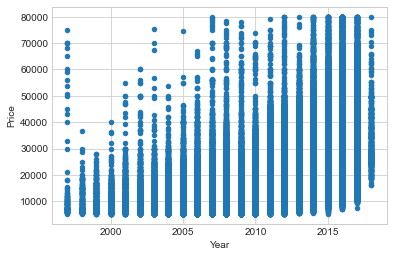

In [27]:
data_final.plot(kind='scatter', y='Price', x='Year')

A continuación realizamos la implementación manual de cross validation Kfold = 10 para 4 diferentes modelos con el fin del elegir el mejor con base en el Rmse
- Lineal Regression
- Random Forest
- XGboost
- Bagging

In [41]:
## Regresión Lineal

# datos = data_final.iloc[:,0:3]
datos = data_final
X = datos.iloc[:500000 ,1:]                 
y = datos.iloc[:500000 ,0]


def cv_manual(X,y,modelo,n_particion):
    def cv_index(X, n_particion):
        n = X.shape[0]
        fold_sizes = np.full(n_particion, n // n_particion, dtype=int)
        fold_sizes[:n % n_particion] += 1
        indices = np.arange(n)
        actual = 0
        indices_train_test = list()
        #Yield retorna un generator
        for fold_size in fold_sizes:
            inicio, parar = actual, actual + fold_size
            yield indices[inicio:parar] ,np.array([i for i in indices if i not in list(range(inicio,parar))])
            actual = parar
        
    # usa los indices creados en la primera funcion para las iteraciones (cv_index)
    ind_test_train= list(cv_index(X,n_particion))  
    metrica_lista = []
    for j in range(n_particion):
        index_test  =  ind_test_train[j][0] 
        index_train =  ind_test_train[j][1]
        
        X_train = X.iloc[index_train,]
        y_train = y.iloc[index_train,]
        
        modelo.fit(X_train,y_train)
        
        X_test = X.iloc[index_test,]
        y_test = y.iloc[index_test,]
        
        #mean squared error
        metrica_lista.append(np.sqrt(metrics.mean_squared_error(y_test, modelo.predict(X_test))))
    
    return metrica_lista , np.mean(metrica_lista)
    
cv_manual(X,y,LinearRegression(),10)

([6449.624989086702,
  6311.838691428078,
  6891.729094043221,
  6099.177011062426,
  6356.0988487149625,
  6463.419385471388,
  6145.121066241003,
  6724.088342267512,
  6254.586895230972,
  6532.367358100393],
 6422.805168164666)

In [42]:
# hiperparameters
seed = np.random.seed(123)
n_B = 100
max_feat_rf = 'sqrt'
max_deep_rf = 20
min_split_rf = 2
min_leaf_rf = 4

In [43]:
## Radom Forest

datos = data_final
X = datos.iloc[:500000 ,1:]                 
y = datos.iloc[:500000 ,0]

def cv_manual(X,y,modelo,n_particion):
    def cv_index(X, n_particion):
        n = X.shape[0]
        fold_sizes = np.full(n_particion, n // n_particion, dtype=int)
        fold_sizes[:n % n_particion] += 1
        indices = np.arange(n)
        actual = 0
        indices_train_test = list()
        #Yield retorna un generator
        for fold_size in fold_sizes:
            inicio, parar = actual, actual + fold_size
            yield indices[inicio:parar] ,np.array([i for i in indices if i not in list(range(inicio,parar))])
            actual = parar
        
    # usa los indices creados en la primera funcion para las iteraciones (cv_index)
    ind_test_train= list(cv_index(X,n_particion))  
    metrica_lista = []
    for j in range(n_particion):
        index_test  =  ind_test_train[j][0] 
        index_train =  ind_test_train[j][1]
        
        X_train = X.iloc[index_train,]
        y_train = y.iloc[index_train,]
        
        modelo.fit(X_train,y_train)
        
        X_test = X.iloc[index_test,]
        y_test = y.iloc[index_test,]
        
        #mean squared error
        metrica_lista.append(np.sqrt(metrics.mean_squared_error(y_test, modelo.predict(X_test))))
    
    return metrica_lista , np.mean(metrica_lista)
    
cv_manual(X,y,RandomForestRegressor(max_depth=max_deep_rf, n_estimators=n_B, max_features=max_feat_rf, random_state=seed, 
                           n_jobs=-1, min_samples_split = min_split_rf, min_samples_leaf = min_leaf_rf),10)

([6098.853619588013,
  5791.901128391525,
  6643.783735069823,
  5739.554762826726,
  5980.7100175082105,
  6105.870032027314,
  5918.1321958736535,
  6283.576529749,
  6125.8375692834015,
  6094.151700710252],
 6078.237129102792)

In [44]:
## Decision Tree using scikit-learn

datos = data_final
X = datos.iloc[:500000 ,1:]                 
y = datos.iloc[:500000 ,0]

def cv_manual(X,y,modelo,n_particion):
    def cv_index(X, n_particion):
        n = X.shape[0]
        fold_sizes = np.full(n_particion, n // n_particion, dtype=int)
        fold_sizes[:n % n_particion] += 1
        indices = np.arange(n)
        actual = 0
        indices_train_test = list()
        #Yield retorna un generator
        for fold_size in fold_sizes:
            inicio, parar = actual, actual + fold_size
            yield indices[inicio:parar] ,np.array([i for i in indices if i not in list(range(inicio,parar))])
            actual = parar
        
    # usa los indices creados en la primera funcion para las iteraciones (cv_index)
    ind_test_train= list(cv_index(X,n_particion))  
    metrica_lista = []
    for j in range(n_particion):
        index_test  =  ind_test_train[j][0] 
        index_train =  ind_test_train[j][1]
        
        X_train = X.iloc[index_train,]
        y_train = y.iloc[index_train,]
        
        modelo.fit(X_train,y_train)
        
        X_test = X.iloc[index_test,]
        y_test = y.iloc[index_test,]
        
        #mean squared error
        metrica_lista.append(np.sqrt(metrics.mean_squared_error(y_test, modelo.predict(X_test))))
    
    return metrica_lista , np.mean(metrica_lista)
    
cv_manual(X,y,DecisionTreeRegressor(random_state=0),10)

([7424.278933413332,
  7572.156347806416,
  8300.61297517388,
  7867.36342824742,
  7976.492860595125,
  7776.2593805280185,
  8176.728692943163,
  8100.354892441442,
  8290.7896820508,
  8030.89404574609],
 7951.593123894568)

In [46]:
from xgboost import XGBRegressor
## XgBoost

datos = data_final
X = datos.iloc[:500000 ,1:]                 
y = datos.iloc[:500000 ,0]

def cv_manual(X,y,modelo,n_particion):
    def cv_index(X, n_particion):
        n = X.shape[0]
        fold_sizes = np.full(n_particion, n // n_particion, dtype=int)
        fold_sizes[:n % n_particion] += 1
        indices = np.arange(n)
        actual = 0
        indices_train_test = list()
        #Yield retorna un generator
        for fold_size in fold_sizes:
            inicio, parar = actual, actual + fold_size
            yield indices[inicio:parar] ,np.array([i for i in indices if i not in list(range(inicio,parar))])
            actual = parar
        
    # usa los indices creados en la primera funcion para las iteraciones (cv_index)
    ind_test_train= list(cv_index(X,n_particion))  
    metrica_lista = []
    for j in range(n_particion):
        index_test  =  ind_test_train[j][0] 
        index_train =  ind_test_train[j][1]
        
        X_train = X.iloc[index_train,]
        y_train = y.iloc[index_train,]
        
        modelo.fit(X_train,y_train)
        
        X_test = X.iloc[index_test,]
        y_test = y.iloc[index_test,]
        
        #mean squared error
        metrica_lista.append(np.sqrt(metrics.mean_squared_error(y_test, modelo.predict(X_test))))
    
    return metrica_lista , np.mean(metrica_lista)
    
cv_manual(X,y,XGBRegressor(objective ='reg:linear', colsample_bytree = 1.0, subsample = 0.9, 
                          max_depth = 3, min_child_weight = 2,  n_estimators = 20),10)

[22:37:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[22:37:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[22:37:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[22:37:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[22:37:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[22:37:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:17

([7027.608827939632,
  6760.9943924395175,
  7585.697898361627,
  6692.106323866285,
  6935.853106768362,
  7100.701311979818,
  6934.0789927734395,
  7155.34857740171,
  7022.697952054732,
  7077.65283096522],
 7029.274021455034)

In [47]:
## Bagging

datos = data_final
X = datos.iloc[:20000 ,1:]                 
y = datos.iloc[:20000 ,0]

def cv_manual(X,y,modelo,n_particion):
    def cv_index(X, n_particion):
        n = X.shape[0]
        fold_sizes = np.full(n_particion, n // n_particion, dtype=int)
        fold_sizes[:n % n_particion] += 1
        indices = np.arange(n)
        actual = 0
        indices_train_test = list()
        #Yield retorna un generator
        for fold_size in fold_sizes:
            inicio, parar = actual, actual + fold_size
            yield indices[inicio:parar] ,np.array([i for i in indices if i not in list(range(inicio,parar))])
            actual = parar
       
    # usa los indices creados en la primera funcion para las iteraciones (cv_index)
    ind_test_train= list(cv_index(X,n_particion))  
    metrica_lista = []
    for j in range(n_particion):
        index_test  =  ind_test_train[j][0]
        index_train =  ind_test_train[j][1]
       
        X_train = X.iloc[index_train,]
        y_train = y.iloc[index_train,]
       
        modelo.fit(X_train,y_train)
       
        X_test = X.iloc[index_test,]
        y_test = y.iloc[index_test,]
       
        #mean squared error
        metrica_lista.append(np.sqrt(metrics.mean_squared_error(y_test, modelo.predict(X_test))))
   
    return metrica_lista , np.mean(metrica_lista)
   
##cv_manual(X,y,DecisionTreeRegressor(max_depth=3, random_state=1),10)


for i in range (1,20):
    rmse=cv_manual(X,y,DecisionTreeRegressor(max_depth=i, random_state=1),10)
    print(rmse,i)

([9590.270322221377, 9442.816112666016, 10354.662355537492, 9341.69060050004, 9551.87911742835, 9782.683326540164, 9693.260069627331, 9892.716517737725, 9539.74355768511, 9662.546683797296], 9685.226866374089) 1
([9259.279252131544, 8903.271623698693, 9809.500162118813, 8798.607518710256, 9020.046578609468, 9333.431842691274, 9049.368215399434, 9368.2412443218, 8993.189926607325, 9194.451268966684], 9172.93876332553) 2
([8809.999208075707, 8406.721810578954, 9374.479313860142, 8352.758606258081, 8620.48736887325, 8971.717676793232, 8576.999725836018, 8930.963214607536, 8587.89205166974, 8726.236581552024], 8735.825555810468) 3
([8299.463926343598, 8061.566500236152, 9028.601100052198, 7922.825290545802, 8325.921917321693, 8539.71193532636, 8139.062483966093, 8536.519082577024, 8230.758918102658, 8333.445156509903], 8341.787631098148) 4
([7891.6271106921, 7698.370417108048, 8686.981959813931, 7641.0084308402165, 7927.493259417354, 8255.852882055175, 7798.055257265901, 8138.569921478616,

## Elección del mejor modelo: 

Teniendo en cuenta el resultado de cada uno de los anteriores modelos y comparando su Rmse, se escogió el modelo Random Forest con un Rmse de 6078.23 usando la implementación manual de cross-validation 10-Kfold. A continuación se calibran los hiperparámetros del modelo

In [57]:
## Radom Forest

datos = data_final
X = datos.iloc[:500000 ,1:]                 
y = datos.iloc[:500000 ,0]


def cv_manual(X,y,modelo,n_particion):
    def cv_index(X, n_particion):
        n = X.shape[0]
        fold_sizes = np.full(n_particion, n // n_particion, dtype=int)
        fold_sizes[:n % n_particion] += 1
        indices = np.arange(n)
        actual = 0
        indices_train_test = list()
        #Yield retorna un generator
        for fold_size in fold_sizes:
            inicio, parar = actual, actual + fold_size
            yield indices[inicio:parar] ,np.array([i for i in indices if i not in list(range(inicio,parar))])
            actual = parar
        
    # usa los indices creados en la primera funcion para las iteraciones (cv_index)
    ind_test_train= list(cv_index(X,n_particion))  
    metrica_lista = []
    for j in range(n_particion):
        index_test  =  ind_test_train[j][0] 
        index_train =  ind_test_train[j][1]
        
        X_train = X.iloc[index_train,]
        y_train = y.iloc[index_train,]
        
        modelo.fit(X_train,y_train)
        
        X_test = X.iloc[index_test,]
        y_test = y.iloc[index_test,]
        
        #mean squared error
        metrica_lista.append(np.sqrt(metrics.mean_squared_error(y_test, modelo.predict(X_test))))
    
    return metrica_lista , np.mean(metrica_lista)
    
a = 0
for i in range (1,10):
    a = a+100
    rmse=cv_manual(X,y,RandomForestRegressor(max_depth=max_deep_rf, n_estimators=a, max_features=max_feat_rf, random_state=seed,
                               n_jobs=-1, min_samples_split = min_split_rf, min_samples_leaf = min_leaf_rf),10)
    print(rmse,a)

([6106.974908140924, 5808.700367591332, 6630.868370348956, 5748.175316873298, 5965.922215009037, 6050.486664766005, 5934.99294772799, 6252.711966963424, 6086.732439005718, 6076.484414561466], 6066.204961098815) 100
([6082.28795132078, 5779.733465698279, 6615.529158915028, 5763.469914643766, 5999.370878957532, 6039.579305085649, 5884.096860968636, 6241.418926280527, 6114.005145430539, 6113.058249927904], 6063.254985722864) 200
([6088.245219305938, 5815.010780238099, 6610.70901788842, 5759.88340065805, 5953.171967977866, 6064.705001093831, 5896.183529356317, 6253.094124883964, 6098.622460551833, 6097.322065421969], 6063.694756737628) 300
([6058.947058726306, 5812.939188310627, 6647.025387049978, 5773.5724493150365, 5987.014336343853, 6059.46168045921, 5887.691553327772, 6250.717072907601, 6099.4803555770895, 6099.426527182159], 6067.627560919964) 400
([6077.236997220375, 5817.6723117027, 6618.51999753715, 5773.294198485986, 5950.311084054251, 6045.777975563254, 5894.731134129032, 6250.82

In [59]:
modelo_final = RandomForestRegressor(max_depth=max_deep_rf, n_estimators=900, max_features=max_feat_rf, random_state=seed, 
                           n_jobs=-1, min_samples_split = min_split_rf, min_samples_leaf = min_leaf_rf)
modelo_final.fit(X, y)

RandomForestRegressor(max_depth=20, max_features='sqrt', min_samples_leaf=4,
                      n_estimators=900, n_jobs=-1)

In [ ]:
modelo_final_2 = RandomForestRegressor(max_depth=max_deep_rf, n_estimators=100, max_features=max_feat_rf, random_state=seed, 
                           n_jobs=-1, min_samples_split = min_split_rf, min_samples_leaf = min_leaf_rf)
modelo_final_2.fit(X, y)

In [100]:
modelo_fin = RandomForestRegressor()
modelo_fin.fit(X, y)

RandomForestRegressor()

In [101]:
modelo_lr = LinearRegression()
modelo_lr.fit(X, y)

LinearRegression()

### Guardar modelo elegido .pkl

In [94]:
import pickle

In [118]:
pickle.dump(modelo_final, open('final_model_rfm.pkl', 'wb'))

In [119]:
pickle.dump(modelo_lr, open('modelo_lr.pkl', 'wb'))

### Prueba de la función predict_proba (model deployment)

In [87]:
from model_deployment_VF import predict_price

In [88]:
predict_price(2016,78000,' CA','Cadillac','CayenneAWD')

29395.975742728904

Debido a que en git hub no pudimos subir el archivo del modelo elegido por su performance ya que el tamaño permitido es de 25MB tuvimos que guardar un modelo menos pesado LinearRegression()

In [120]:
from model_deployment_LR import predict_price_lr

In [121]:
predict_price_lr(2016,78000,' CA','Cadillac','CayenneAWD')

34014.24806436058

# Exercise P2.2 (50%)

Create an API of the model.

Example:
![](https://raw.githubusercontent.com/albahnsen/PracticalMachineLearningClass/master/notebooks/images/img015.PNG)

#### Evaluation:
- 40% - API hosted on a cloud service
- 10% - Show screenshots of the model doing the predictions on the local machine


In [ ]:
from flask import Flask, request
from model_deployment_VF import predict_price

app = Flask(__name__)

@app.route('/predict', methods=['GET'])
def Pricepredict():
    return {
         "Precio Estimado": predict_price(request.args.get('YEAR'), request.args.get('MILEAGE'),request.args.get('STATE'), request.args.get('MAKE'), request.args.get('MODEL'))
        }, 200


if __name__ == '__main__':
    app.run(debug=True, use_reloader=False, host='0.0.0.0', port=8888)

### Creación del host en AWS

https://ec2-3-138-121-66.us-east-2.compute.amazonaws.com:8888/predict?YEAR=2016&MILEAGE=%2078000&STATE=%20%27%20CA%27&MAKE=%20%27Cadillac%27&MODEL%20=%20%27CayenneAWD%27